In [136]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#999999",
    "#FF9999",
]

hatches = ["\\", "x", "+", "/"]

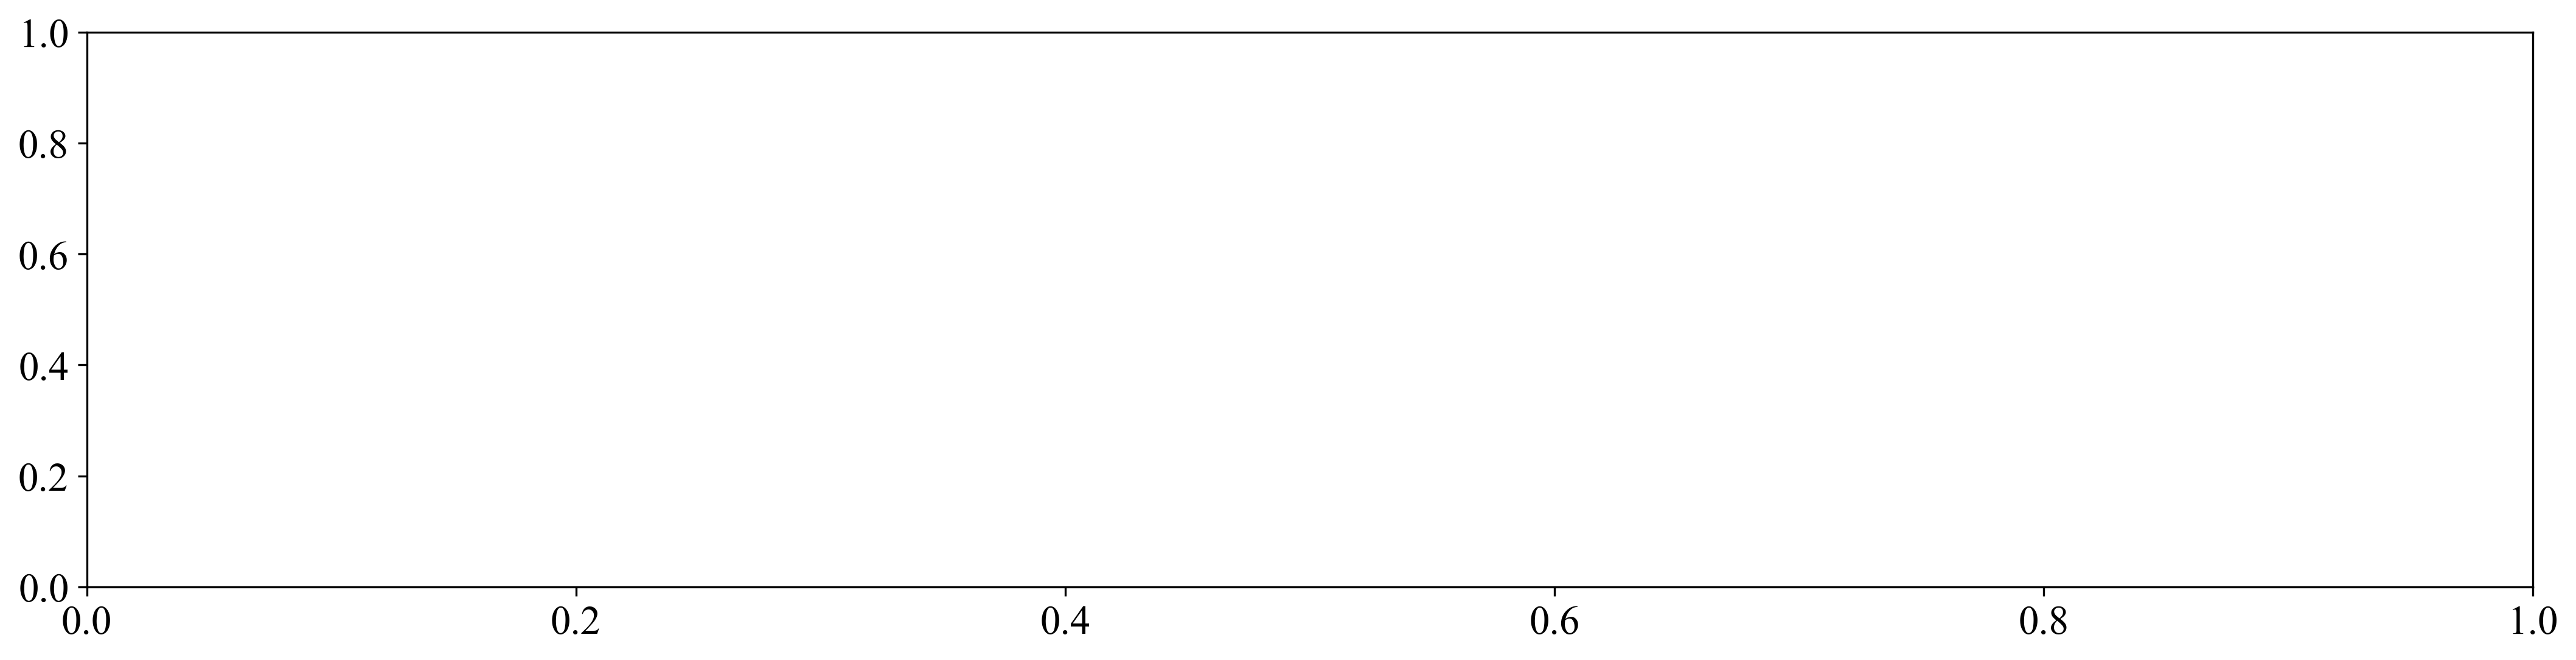

In [137]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 4), ncols=1, nrows=1, constrained_layout=True, dpi=300
)

In [138]:
data_a = {
    "8TP(Vanilla)+2DP#16GPUs": [3.33, 3.025], 
    "8TP(MicroBatch)+2DP#16GPUs": [3.88, 3.03], 
    "2TP+4FSDP#8GPUs": [3.02, 2.85], 
    "8TP#16GPUs": [2.98, 2.81] 
}

In [144]:
for k, vs in data_a.items():
    print((vs[0] - vs[1]) / vs[0])

0.09159159159159164
0.21907216494845363
0.056291390728476796
0.057046979865771785


In [139]:
legend_labels = ["FSDP", "DLRover-Lynx"]

In [140]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

for x_label, y_data in data_a.items():
    group_positions[x_label] = []
    for i in range(len(y_data)):
        group_positions[x_label].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for x_label, positions in group_positions.items():
    group_centers[x_label] = sum(positions) / len(positions)

In [141]:
label_set = set()
for x_label, y_data in data_a.items():
    positions = group_positions[x_label]
    for i, (pos, value, color, hatch, label) in enumerate(
        zip(positions, y_data, colors, hatches, legend_labels)
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(label)
        ax.bar(
            pos,
            value,
            width=bar_width,
            color=color,
            edgecolor="black",
            hatch=hatch,
            label=local_label,
        )

ax.set_xticks(list(group_centers.values()))
ax.set_xticklabels(list(data_a.keys()))

ax.set_ylim(0, 4.5)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(
    ["0", "1", "2", "3", "4"], rotation=90, ha="center", va="center"
)

ax.tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax.tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax.set_ylabel("ITERATION TIME (S)", fontsize=g_label_fontsize)

Text(13.333333333333346, 0.5, 'ITERATION TIME (S)')

In [142]:
fig.legend(
    ncol=2,
    loc="upper center",
    frameon=True,
    shadow=False,
    bbox_to_anchor=(0.5, 1.14),
    fontsize=g_label_fontsize,
)

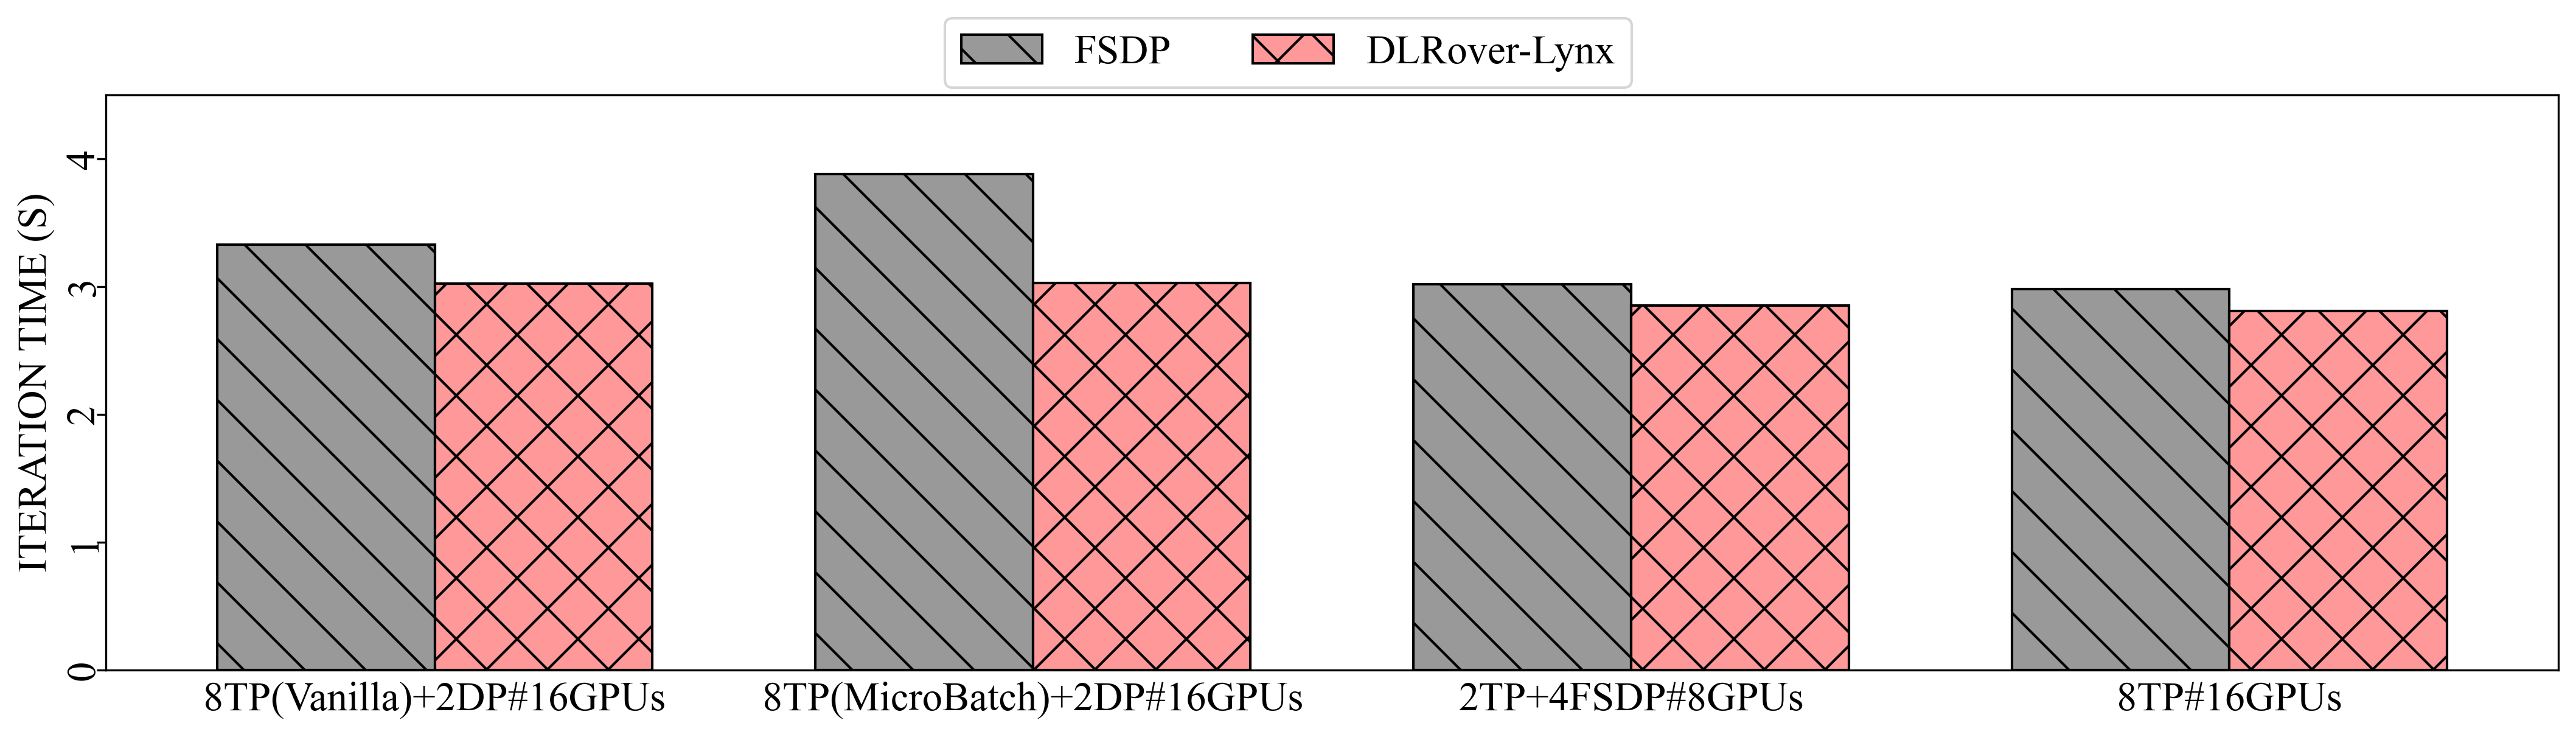

In [143]:
fig.savefig("lynx_hybrid_parallel_nfsc.pdf", bbox_inches="tight", dpi=1000)
fig